In [202]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [203]:
df = pd.read_csv('Resources/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [204]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [205]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Fixing the TotalCharges column.  There were no nulls but there were empty values preventing conversion to float.

In [207]:
# Replace empty strings with 0
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

# Convert the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Replace 0 values with the mean value
mean_value = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].replace(0, mean_value)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [209]:
df.drop(columns='customerID',inplace=True)

# Data Exploration

In [210]:
def plot_churn(df, feature, target='Churn'):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=feature, hue=target)
    plt.title(f'Churn by {feature}', fontsize=15)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

Gender does not seem play a role in churn

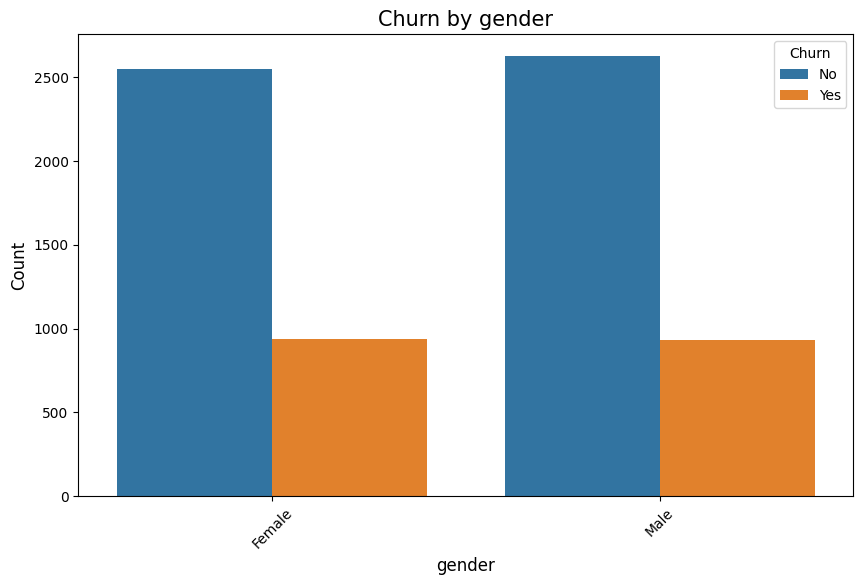

In [211]:
# call the function
plot_churn(df, 'gender')

Customers without a partner are more likely to churn

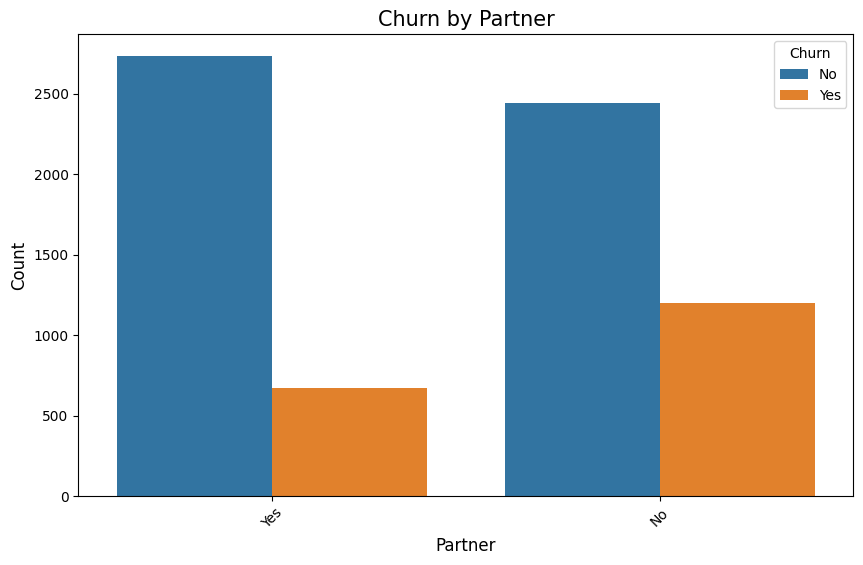

In [212]:
plot_churn(df,'Partner')

Customers with no dependents are more likely to churn

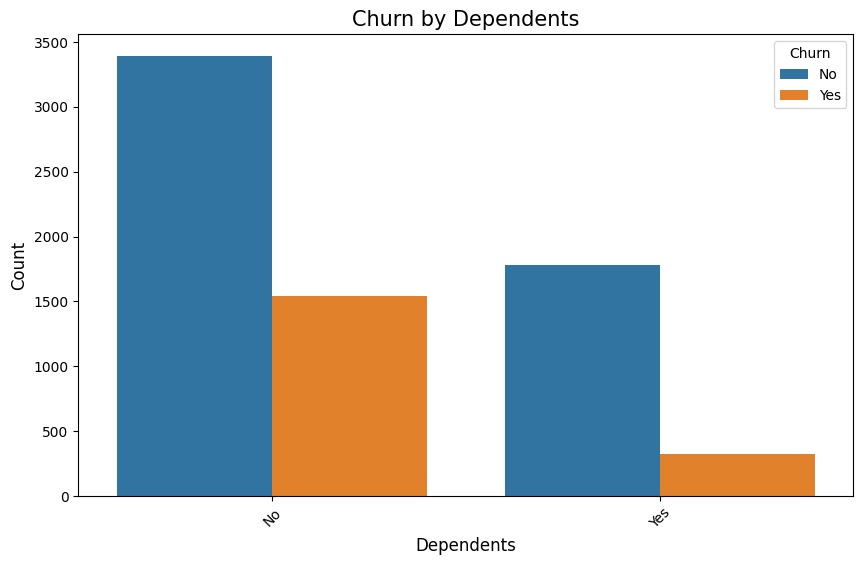

In [213]:
plot_churn(df,'Dependents')

Month-to-month contracts are MUCH more likely to churn

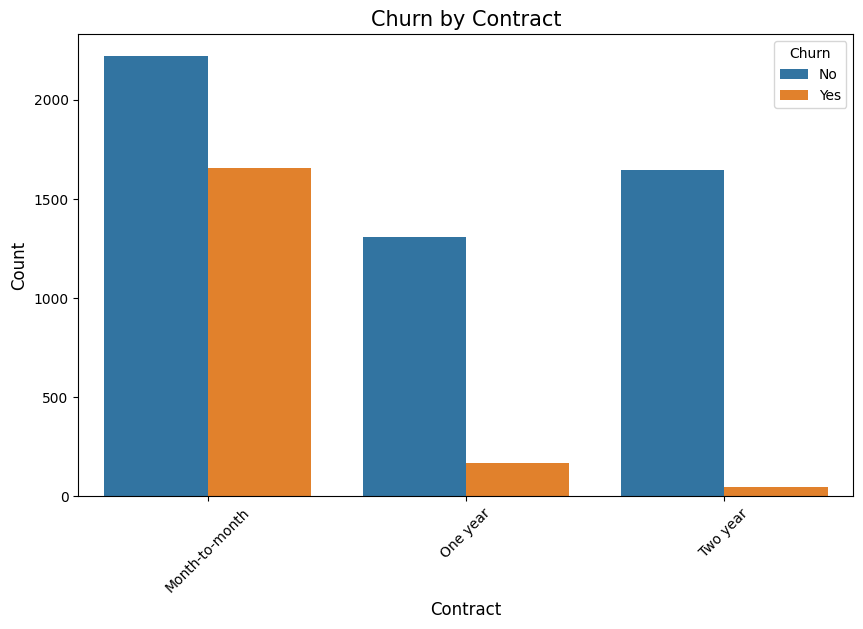

In [214]:
plot_churn(df,'Contract')

Customers without device protection are more likely to churn

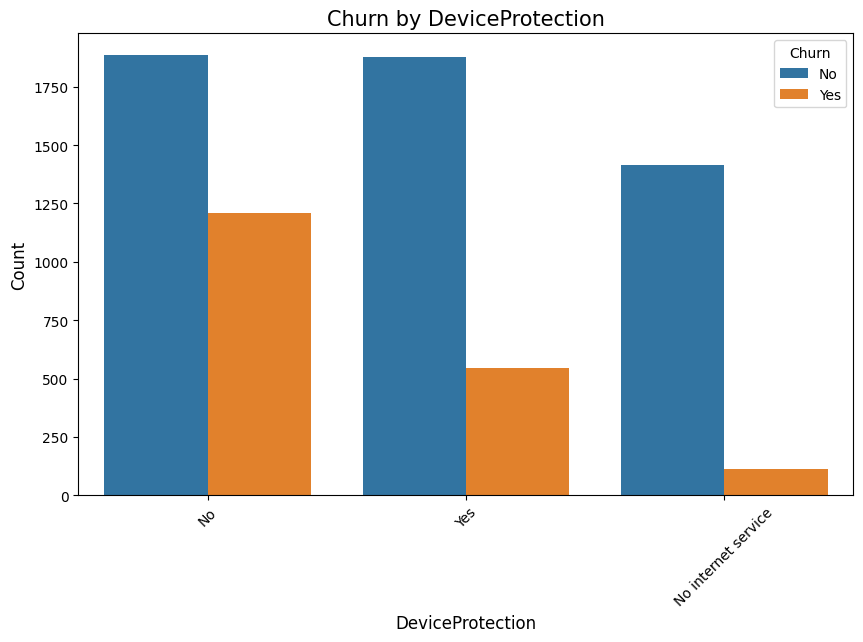

In [215]:
plot_churn(df,'DeviceProtection')

Customers with paperless billing are more likely to churn, but also double the amount of representation

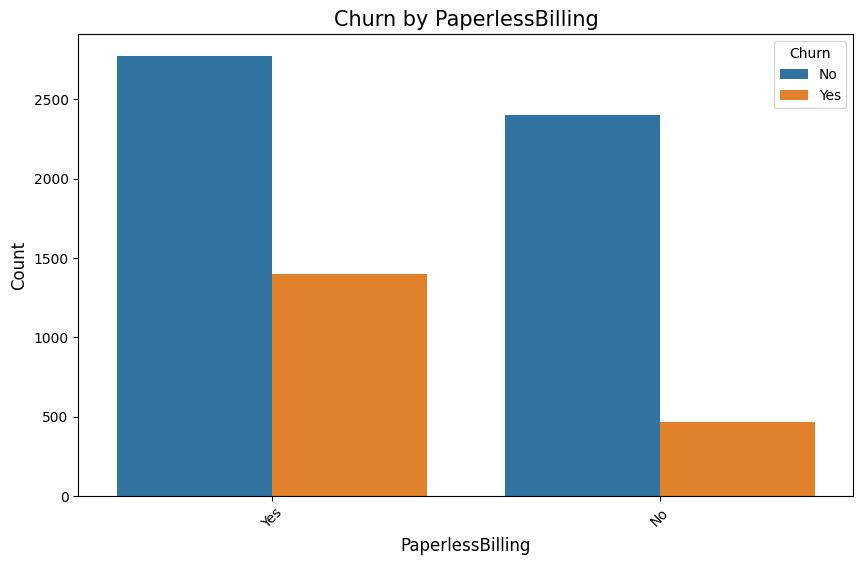

In [216]:
plot_churn(df,'PaperlessBilling')

In [217]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

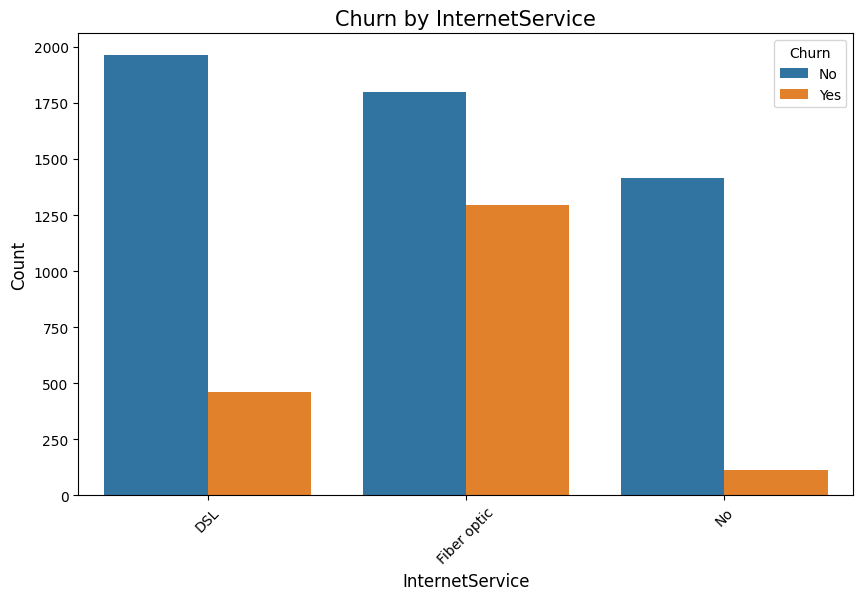

In [218]:
plot_churn(df,'InternetService')

In [219]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

The data is imbalanced, so we'll attempt to balance it.

In [220]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [221]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [222]:
X = df.drop('Churn', axis=1)  
y = df['Churn']
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [223]:
# y_resampled.value_counts()

Split the data into training and test sets

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train,y_train)

In [227]:
y_train.value_counts()

No     4138
Yes    1496
Name: Churn, dtype: int64

## Scale the data

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [229]:
import joblib

In [230]:
scaler.fit(X_train_resampled[['tenure','MonthlyCharges','TotalCharges']])
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [231]:
X_train_resampled[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_train_resampled[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

## Encode Categorical Data

In [232]:
from sklearn.preprocessing import OneHotEncoder

In [233]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [234]:
categories = ['gender', 
              'SeniorCitizen', 
              'Partner', 
              'Dependents',
              'PhoneService', 
              'MultipleLines', 
              'InternetService', 
              'OnlineSecurity',
              'OnlineBackup', 
              'DeviceProtection', 
              'TechSupport', 
              'StreamingTV',
              'StreamingMovies', 
              'Contract', 
              'PaperlessBilling', 
              'PaymentMethod']

In [235]:
encoder = OneHotEncoder()

In [236]:
categorical_train_data = X_train_resampled[categories]
encoder.fit(categorical_train_data)
encoded_train_data = encoder.transform(categorical_train_data).toarray()

In [237]:
# Transform the test data
categorical_test_data = X_test[categories]
encoded_test_data = encoder.transform(categorical_test_data).toarray()

In [238]:
encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categories), index=X_train_resampled.index)
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categories), index=X_test.index)

In [239]:
# Concatenate the original dataframes with the new ones
X_train_encoded = pd.concat([X_train_resampled.drop(categories, axis=1), encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(categories, axis=1), encoded_test_df], axis=1)

In [240]:
X_train_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

In [241]:
X_train_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.291252,-0.106289,-0.332271,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.090018,1.014533,1.404912,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.128385,-1.540663,-0.933837,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.002815,0.079071,-0.835588,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.170242,-0.208496,0.099630,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Base Model Testing

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [243]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier())
]

In [244]:
def test_models(models, X_train, y_train, X_test, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f'{name} Accuracy: {accuracy * 100:.2f}%')

In [245]:
test_models(models, X_train_encoded, y_train_resampled, X_test_encoded, y_test)

Logistic Regression Accuracy: 74.66%
Support Vector Machine Accuracy: 76.01%
Random Forest Accuracy: 79.35%


## Parameter Tuning

In [246]:
from sklearn.model_selection import GridSearchCV

def best_parameters(model, params, X, y, cv=5):
    grid = GridSearchCV(model, params, cv=cv)
    grid.fit(X, y)
    print("Best parameters for ", str(model), " are ", grid.best_params_)
    print("Best score for ", str(model), " is ", grid.best_score_)
    return grid.best_params_

Logistic Regression tuning
- The tuned model performed worse than the base model

In [247]:
# Define the model and parameters
model = LogisticRegression(max_iter=1000)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'penalty': ['l1', 'l2'],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Get best parameters
best_LR_params = best_parameters(model, params, X_train_encoded, y_train_resampled)

Best parameters for  LogisticRegression(max_iter=1000)  are  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score for  LogisticRegression(max_iter=1000)  is  0.7608736517944452


c:\Users\ASROCK Z590M Phantom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASROCK Z590M Phantom\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASROCK Z590M Phantom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ASROCK Z590M Phantom\anaconda3\lib\site-packages\sklearn\linear_model\_logis

SVC Tuning
- I tried multiple different parameters and let it run for an hour each time but it never finished.
- After some research, I found out this model is known for having a long training time

In [248]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# model = SVC()
# # Specifying the parameters. The difference here is that we provide a distribution for continuous parameters rather than a list of specific values.
# params = {'C': uniform(loc=0, scale=1000), 
#           'gamma': uniform(loc=0, scale=1),
#           'kernel': ['linear', 'rbf']}

# # Instantiate the RandomizedSearchCV object
# rscv = RandomizedSearchCV(model, params, n_iter=100, cv=5, random_state=42)

# # This will start the search over the specified parameter distributions
# rscv.fit(X_train_encoded, y_train)

# # Get the best parameters and the best score
# best_svc_params = rscv.best_params_
# best_svc_score = rscv.best_score_

# print("Best parameters for SVC are ", best_svc_params)
# print("Best score for SVC is ", best_svc_score)


Random Forest Tuning

In [249]:
model = RandomForestClassifier()
params = {
    'n_estimators': [100],  # 100 is a good general starting point
    'max_features': ['auto', 'sqrt', 0.5],  # Lower values can help to decrease complexity
    'max_depth': [10, 20, 30],  # Lower values can also decrease complexity
    'min_samples_split': [5, 10, 20],  # Higher values lead to more regularization
    'min_samples_leaf': [5, 10, 20],  # Higher values also lead to more regularization
    'bootstrap': [True]  # True can lead to a more diverse set of trees
}

# Get best parameters
best_forest_params = best_parameters(model, params, X_train_encoded, y_train_resampled)

Best parameters for  RandomForestClassifier()  are  {'bootstrap': True, 'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best score for  RandomForestClassifier()  is  0.8476351124538436


## Testing with updated parameters

In [250]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Random Forest Test

In [251]:
model = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='auto', 
                               min_samples_leaf=1, min_samples_split=2, n_estimators=10)
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

Training Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4138
         Yes       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

Test Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1036
         Yes       0.63      0.43      0.51       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Training Confusion Matrix:
[[4133    5]
 [   3 4135]]
Test Confusion Matrix:
[[943  93]
 [213 160]]
Training AUC-ROC Score:
0.999996758753876
Test AUC-ROC Score:
0.7770270270270271


Logistic Regression Test

In [260]:
model = LogisticRegression(max_iter=1000,C= 1, penalty= 'l2', solver= 'sag')
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

Training Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.72      0.75      4138
         Yes       0.74      0.80      0.77      4138

    accuracy                           0.76      8276
   macro avg       0.76      0.76      0.76      8276
weighted avg       0.76      0.76      0.76      8276

Test Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.72      0.81      1036
         Yes       0.51      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Training Confusion Matrix:
[[3000 1138]
 [ 828 3310]]
Test Confusion Matrix:
[[746 290]
 [ 67 306]]
Training AUC-ROC Score:
0.8450326647528327
Test AUC-ROC Score:
0.8615123645284504


# Feature Engineering
- Tenure was not scaled for the previous models, these tests will scale tenure with the other numerical features

In [253]:
#scaler = StandardScaler()
import joblib

In [ ]:
# # Fit on the training data
# scaler.fit(X_train_encoded[['tenure']])
# joblib.dump(scaler,'scaler.joblib')
# # Transform the 'Tenure' column in both the training and test sets
# X_train_encoded['tenure'] = scaler.transform(X_train_encoded[['tenure']])
# X_test_encoded['tenure'] = scaler.transform(X_test_encoded[['tenure']])

Testing the base models with the scaled 'tenure' feature

In [259]:
test_models(models, X_train_encoded, y_train_resampled, X_test_encoded, y_test)

Logistic Regression Accuracy: 74.66%
Support Vector Machine Accuracy: 76.01%
Random Forest Accuracy: 78.50%


Testing with optimized models

Random Forest
- As nice as a perfect model looks, these parameters might be overfitting.

In [255]:
model = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='auto', 
                               min_samples_leaf=1, min_samples_split=2, n_estimators=10)
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

Training Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4138
         Yes       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276

Test Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1036
         Yes       0.63      0.45      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Training Confusion Matrix:
[[4133    5]
 [   3 4135]]
Test Confusion Matrix:
[[938  98]
 [206 167]]
Training AUC-ROC Score:
0.999996758753876
Test AUC-ROC Score:
0.7904952539671037


Random Forest Model V2

In [256]:
# Best model with new params = 'bootstrap': True, 'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100
# 
model = RandomForestClassifier(bootstrap=True, max_depth=20, max_features=0.5, 
                               min_samples_leaf=5, min_samples_split=10, n_estimators=100)
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

Training Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.91      0.93      4138
         Yes       0.91      0.96      0.93      4138

    accuracy                           0.93      8276
   macro avg       0.93      0.93      0.93      8276
weighted avg       0.93      0.93      0.93      8276

Test Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.81      0.85      1036
         Yes       0.58      0.71      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

Training Confusion Matrix:
[[3745  393]
 [ 165 3973]]
Test Confusion Matrix:
[[843 193]
 [110 263]]
Training AUC-ROC Score:
0.9861880282501172
Test AUC-ROC Score:
0.845610307741675


Random Forest Model V3

In [257]:
#Best parameters for  RandomForestClassifier()  are  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
#Best score for  RandomForestClassifier()  is  0.8029813979804603
model = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', 
                               min_samples_leaf=5, min_samples_split=5, n_estimators=100)
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

Training Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.81      0.85      4138
         Yes       0.82      0.91      0.86      4138

    accuracy                           0.86      8276
   macro avg       0.86      0.86      0.86      8276
weighted avg       0.86      0.86      0.86      8276

Test Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.76      0.83      1036
         Yes       0.54      0.79      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Training Confusion Matrix:
[[3335  803]
 [ 374 3764]]
Test Confusion Matrix:
[[787 249]
 [ 77 296]]
Training AUC-ROC Score:
0.931699760860277
Test AUC-ROC Score:
0.8620907387663419


Random Forest Model V4

In [258]:
#Best parameters for  RandomForestClassifier()  are  {'bootstrap': True, 'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
model = RandomForestClassifier(bootstrap=True, max_depth=30, max_features=0.5, 
                               min_samples_leaf=5, min_samples_split=10, n_estimators=100)
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

Training Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.90      0.93      4138
         Yes       0.91      0.96      0.93      4138

    accuracy                           0.93      8276
   macro avg       0.93      0.93      0.93      8276
weighted avg       0.93      0.93      0.93      8276

Test Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.80      0.84      1036
         Yes       0.57      0.72      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

Training Confusion Matrix:
[[3733  405]
 [ 159 3979]]
Test Confusion Matrix:
[[830 206]
 [105 268]]
Training AUC-ROC Score:
0.9862513639514096
Test AUC-ROC Score:
0.8465949672383989


In [ ]:
joblib.dump(encoder,'encoder.joblib')

In [ ]:
#saving the model
from joblib import dump

# assuming model is your trained model
dump(model, 'model.joblib')

Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000,C= 1, penalty= 'l2', solver= 'sag')
model.fit(X_train_encoded, y_train_resampled)

# Make predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_resampled, train_preds))

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, test_preds))

# Print confusion matrices
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_resampled, train_preds))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

# Print AUC-ROC scores
print("Training AUC-ROC Score:")
print(roc_auc_score(y_train_resampled, model.predict_proba(X_train_encoded)[:, 1]))
print("Test AUC-ROC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:, 1]))

In [ ]:
X_train_encoded.columns

## Model Test: Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(solver='lbfgs', random_state=1,max_iter=500)

In [ ]:
# classifier.fit(X_train_encoded, y_train)

The score isn't bad, but let's see if we can do better.

In [ ]:
# # Score the model
# print(f"Training Data Score: {classifier.score(X_train_encoded, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test_encoded, y_test)}")

## Logistic Regression V2